In [4]:
from keras.models import Sequential
from tensorflow.keras import utils as np_utils
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile
import tensorflow as tf

In [21]:
classifier = Sequential()
classifier.add(Conv2D(filters = 32, kernel_size = (5, 5),activation = 'relu', input_shape = (32,32,1)))
classifier.add(Conv2D(filters = 64, kernel_size = (5, 5),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(filters = 32, kernel_size = (3, 3),activation = 'relu'))
classifier.add(Conv2D(filters = 64, kernel_size = (3, 3),activation = 'relu'))
classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(.2))
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(.2))
classifier.add(Dense(units = 50, activation = 'softmax'))
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
classifier.compile(optimizer = opt , loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [22]:
classifier.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 conv2d_21 (Conv2D)          (None, 24, 24, 64)        51264     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_22 (Conv2D)          (None, 10, 10, 32)        18464     
                                                                 
 conv2d_23 (Conv2D)          (None, 8, 8, 64)          18496     
                                                                 
 flatten_5 (Flatten)         (None, 4096)              0         
                                                      

In [35]:
ImageFile.LOAD_TRUNCATED_IMAGES = True
datagen = ImageDataGenerator()
data_set = datagen.flow_from_directory('Dataset/BanglaLekha-Isolated/BanglaLekha-Isolated/data_set', target_size = (32,32), 
                                                 batch_size = 1, class_mode = 'categorical')

Found 118698 images belonging to 60 classes.


In [24]:
len(data_set)

118698

In [27]:
!pip show scikit_learn

Name: scikit-learn


Version: 1.1.3
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\ghosh\appdata\local\programs\python\python39\lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: 


In [9]:
import sklearn

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
import splitfolders

In [12]:
splitfolders.ratio('Dataset/BanglaLekha-Isolated/BanglaLekha-Isolated/data_set',output="Dataset/BanglaLekha-Isolated/BanglaLekha-Isolated/main",seed=1337,ratio=(.8,.2),group_prefix=None)

In [16]:
ImageFile.LOAD_TRUNCATED_IMAGES = True
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = .2, rotation_range = 25)
val_datagen = ImageDataGenerator(rescale = 1./255)
train_data_set = train_datagen.flow_from_directory('Dataset/BanglaLekha-Isolated/BanglaLekha-Isolated/main/train', target_size = (32,32), 
                                                 batch_size = 1, class_mode = 'categorical',color_mode="grayscale")
val_data_set = val_datagen.flow_from_directory('Dataset/BanglaLekha-Isolated/BanglaLekha-Isolated/main/val', target_size = (32,32), 
                                                 batch_size = 1, class_mode = 'categorical',color_mode="grayscale")

Found 79142 images belonging to 50 classes.
Found 19808 images belonging to 50 classes.


In [17]:
len(train_data_set)

79142

In [19]:
len(val_data_set)

19808

In [23]:
model_history=classifier.fit_generator(train_data_set, steps_per_epoch =79142, epochs = 10,
                        validation_data = val_data_set, validation_steps = 19808)

Epoch 1/10


C:\Users\ghosh\AppData\Local\Temp\ipykernel_11712\430951441.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=classifier.fit_generator(train_data_set, steps_per_epoch =79142, epochs = 10,


79142/79142 [==============================] - 799s 10ms/step - loss: 1.6844 - accuracy: 0.5238 - val_loss: 0.7083 - val_accuracy: 0.7906
Epoch 2/10
79142/79142 [==============================] - 770s 10ms/step - loss: 0.8584 - accuracy: 0.7495 - val_loss: 0.5571 - val_accuracy: 0.8315
Epoch 3/10
79142/79142 [==============================] - 760s 10ms/step - loss: 0.6764 - accuracy: 0.8044 - val_loss: 0.5087 - val_accuracy: 0.8524
Epoch 4/10
79142/79142 [==============================] - 889s 11ms/step - loss: 0.5926 - accuracy: 0.8321 - val_loss: 0.4399 - val_accuracy: 0.8760
Epoch 5/10
79142/79142 [==============================] - 849s 11ms/step - loss: 0.5313 - accuracy: 0.8485 - val_loss: 0.3951 - val_accuracy: 0.8905
Epoch 6/10
79142/79142 [==============================] - 830s 10ms/step - loss: 0.4938 - accuracy: 0.8588 - val_loss: 0.3773 - val_accuracy: 0.8961
Epoch 7/10
79142/79142 [==============================] - 838s 11ms/step - loss: 0.4696 - accuracy: 0.8665 - val_loss

In [24]:
model_history.params

{'verbose': 1, 'epochs': 10, 'steps': 79142}

In [25]:
model_history.history

{'loss': [1.6843539476394653,
  0.8583548069000244,
  0.6763797998428345,
  0.5925560593605042,
  0.531265377998352,
  0.49384990334510803,
  0.4696071445941925,
  0.4494037926197052,
  0.4345165491104126,
  0.42162519693374634],
 'accuracy': [0.5237674117088318,
  0.7494882345199585,
  0.8044275045394897,
  0.8321498036384583,
  0.8485380411148071,
  0.8588107228279114,
  0.8664552569389343,
  0.8734173774719238,
  0.8783073425292969,
  0.8819590210914612],
 'val_loss': [0.7082683444023132,
  0.557073175907135,
  0.5086631774902344,
  0.43991991877555847,
  0.3950752317905426,
  0.37728065252304077,
  0.3853139877319336,
  0.3837504982948303,
  0.3768823444843292,
  0.3771888315677643],
 'val_accuracy': [0.7905896902084351,
  0.8315327167510986,
  0.8523828983306885,
  0.8760097026824951,
  0.8904988169670105,
  0.8960521221160889,
  0.8985763192176819,
  0.8952443599700928,
  0.9003937840461731,
  0.9008481502532959]}

<function matplotlib.pyplot.show(close=None, block=None)>

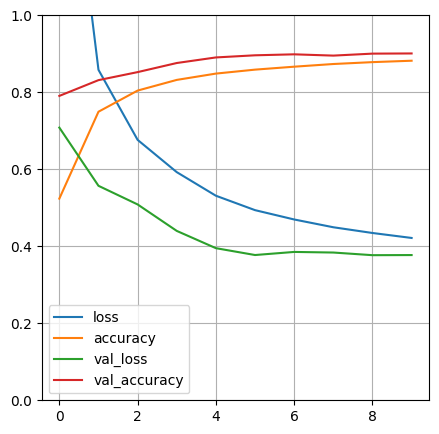

In [31]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(5,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

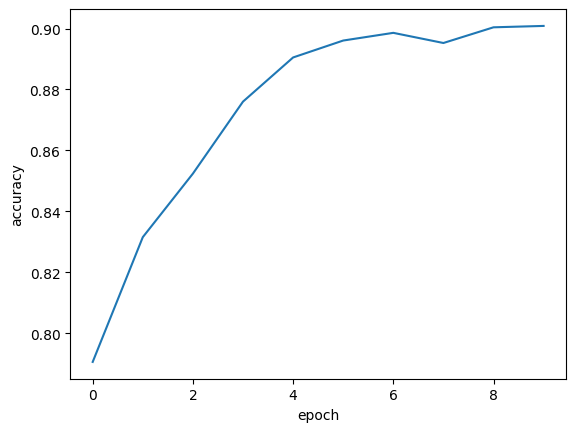

In [35]:
plt.plot(model_history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

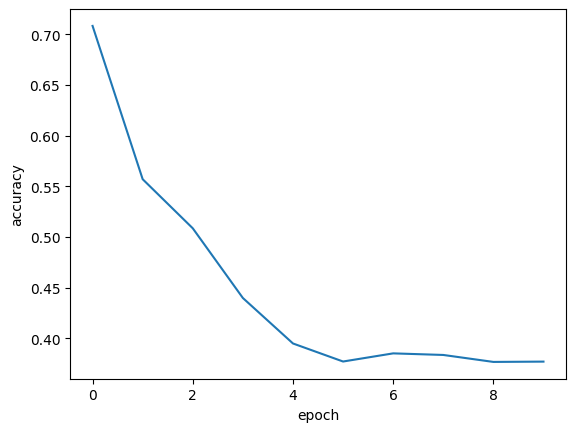

In [37]:
plt.plot(model_history.history['val_loss'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()